<a href="https://colab.research.google.com/github/luanavsr/VaR_Portfolio/blob/main/VaR_Portfolio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# VaR - Value at Risk

O objetivo desse código é calcular o VaR (valor em risco) de um portfólio. Esse método calcula a maior perda esperada em um determinado período de tempo e associado a um intervalo de confiança.

É importante ressaltar que o modelo possui algumas limitações, tais como: o VaR assume que os retornos seguem uma distribuição normal, a escolha do nível de confiança afeta o resultado do VaR e não considera caudas pesadas (perdas extremas). Mas apesar disso, o modelo serve como uma boa ferramenta para se avaliar riscos.

Além disso, existem várias formas de fazer um VaR, algumas são: VaR individual para cada ativo ou para uma carteira, VaR diversificado que considera a relação entre ativos, VaR estressado que considera a piora na relação entre os ativos. Aqui usarei o VaR individual para a carteira.

In [ ]:
# Importando os pacotes
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib.pyplot as plt
from scipy.stats import norm

In [ ]:
# Baixando os dados
start_date = '2017-12-31'
end_date = '2023-12-29'

# Preço de fechamento ajustado do Ibovespa, SP500 e Nasdaq
stocks_list = ['^BVSP', '^GSPC', '^IXIC']
data_df = yf.download(stocks_list, start=start_date, end=end_date)['Adj Close']

# Calculando os retornos em log, para retorno simples use: data_df.pct_change().dropna()
returns_df = data_df.apply(np.log).diff().dropna()

# Definindo o peso de cada ativo no portfólio (equal weights)
weights = [1 / returns_df.columns.size] * returns_df.columns.size

# Calculando o retorno diário do portfólio e transformando em dataframe
port_returns = returns_df.mul(weights, axis=1).sum(axis=1)
port_returns = pd.DataFrame(port_returns, columns = ['Port Return'])

# Definindo o nível de confiança (99%)
alpha = 0.01

# Calculando o VaR diário do portfólio
var = norm.ppf(alpha, port_returns.mean(), port_returns.std())

# Definindo um capital inicial e a perda máxima em termos monetários
capital = 1000
max_loss = var*capital*-1

# Print dos resultados
print(f'\n \n Para um intervalo de confiança de {(1-alpha)*(100)}%, o VaR diário é {var[0]*100}% para o portfólio. \n Em termos monetários, considerando um capital de R${capital}, a perda máxima diária é de R${max_loss[0]}')

[*********************100%%**********************]  3 of 3 completed


 
 Para um intervalo de confiança de 99.0%, o VaR diário é -3.068153054372214% para o portfólio. 
 Em termos monetários, considerando um capital de R$1000, a perda máxima diária é de R$30.68153054372214


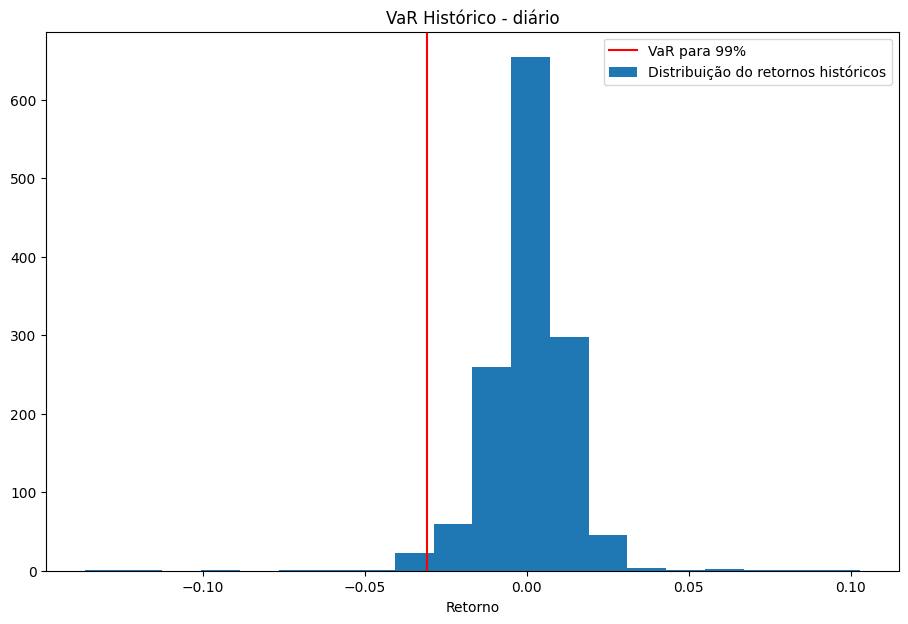

In [ ]:
# Plot da distribuição dos retornos
plt.figure(figsize = (11,7))
plt.hist(port_returns.values, bins=20)
plt.axvline(var[0], color='red', linestyle='solid');
plt.legend(['VaR para 99%', 'Distribuição do retornos históricos'])
plt.title('VaR Histórico - diário');
plt.xlabel('Retorno');